In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
df = pd.read_csv('diabetes.csv')

In [15]:
# Pilih fitur yang ingin digunakan
fitur = ['Glucose', 'BMI', 'Age', 'Insulin']
data = df[fitur].copy()


In [16]:
# Anggap nilai 0 sebagai data kosong
data.replace(0, pd.NA, inplace=True)

# Isi nilai kosong dengan rata-rata masing-masing kolom
data.fillna(data.mean(), inplace=True)


C:\Users\pc\AppData\Local\Temp\ipykernel_8040\1134689166.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.fillna(data.mean(), inplace=True)


In [17]:
# Standardisasi data agar skala seragam
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [18]:
# Inisialisasi dan latih model K-Means
kmeans = KMeans(n_clusters=3, random_state=0)

# Prediksi cluster untuk setiap baris data
df['Cluster'] = kmeans.fit_predict(data_scaled)


In [19]:
# Lihat hasil clustering
df[['Glucose', 'BMI', 'Age', 'Insulin', 'Cluster']].head()


,Glucose,BMI,Age,Insulin,Cluster
0,148,33.6,50,0,1
1,85,26.6,31,0,0
2,183,23.3,32,0,1
3,89,28.1,21,94,0
4,137,43.1,33,168,2


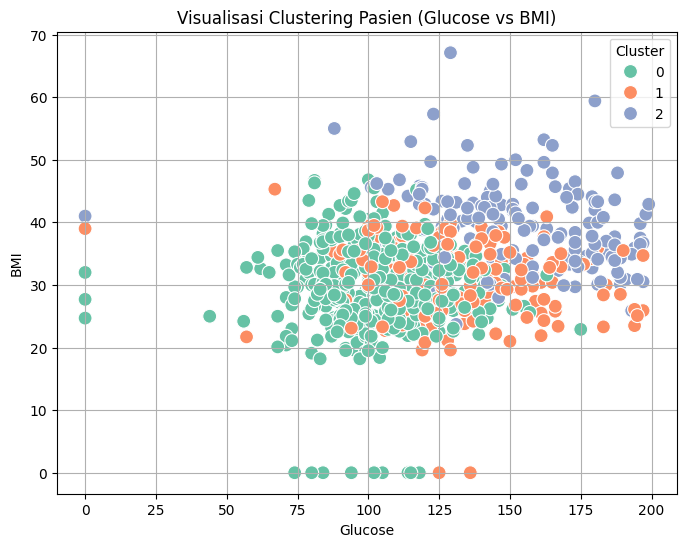

In [20]:
# Visualisasi hasil clustering menggunakan scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Cluster', palette='Set2', s=100)
plt.title('Visualisasi Clustering Pasien (Glucose vs BMI)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.grid(True)
plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_8040\3776628977.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Cluster', palette='Set2')


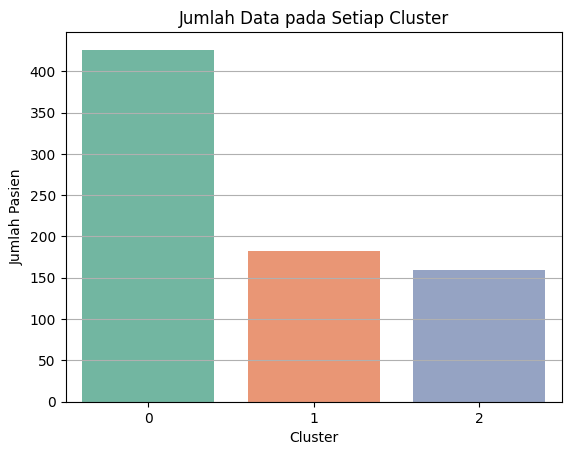

In [21]:
# Visualisasi jumlah data di tiap cluster
sns.countplot(data=df, x='Cluster', palette='Set2')
plt.title('Jumlah Data pada Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Pasien')
plt.grid(True, axis='y')
plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_8040\2310728207.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='Glucose', palette='Set2')


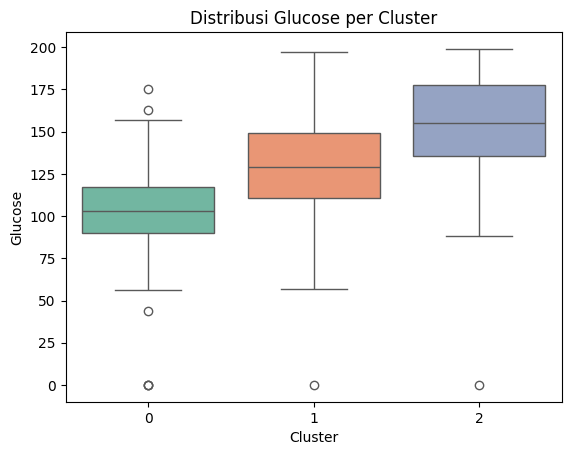

In [22]:
# Visualisasi distribusi Glucose per cluster
sns.boxplot(data=df, x='Cluster', y='Glucose', palette='Set2')
plt.title('Distribusi Glucose per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Glucose')
plt.show()


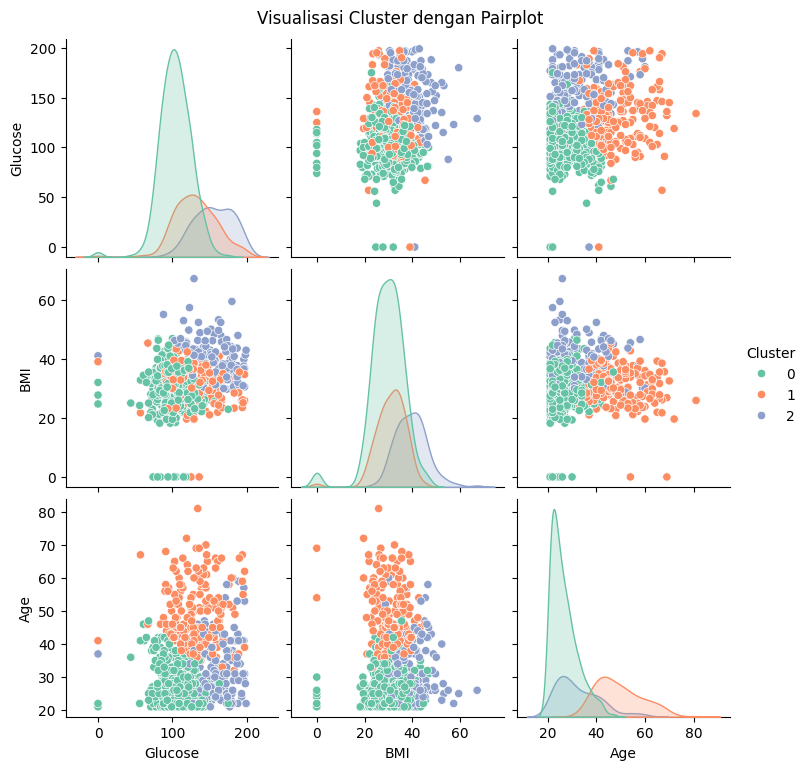

In [23]:
# Visualisasi pasangan fitur antar cluster
sns.pairplot(df, hue='Cluster', vars=['Glucose', 'BMI', 'Age'], palette='Set2')
plt.suptitle('Visualisasi Cluster dengan Pairplot', y=1.02)
plt.show()


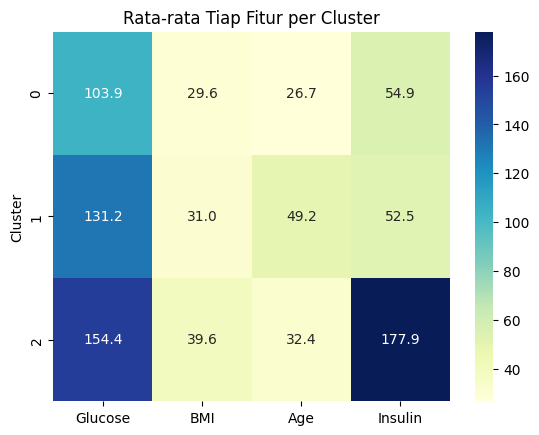

In [29]:
# Hitung rata-rata tiap fitur untuk masing-masing cluster
cluster_means = df.groupby('Cluster')[['Glucose', 'BMI', 'Age', 'Insulin']].mean()

# Heatmap visualisasi rata-rata tiap cluster
sns.heatmap(cluster_means, annot=True, fmt= '.1f', cmap='YlGnBu')
plt.title('Rata-rata Tiap Fitur per Cluster')
plt.show()


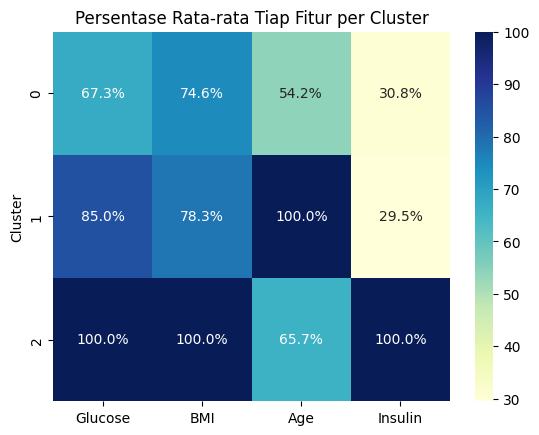

In [ ]:
cluster_percent = cluster_means / cluster_means.max() * 100
percent_labels = np.round(cluster_percent.values, 1).astype(str) + '%'

sns.heatmap(cluster_percent, annot=percent_labels, fmt='', cmap='YlGnBu',
             xticklabels=cluster_percent.columns, yticklabels=cluster_percent.index)
plt.title('Persentase Rata-rata Tiap Fitur per Cluster')
plt.show()